Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Note that this Pre-class Work is estimated to take **35 minutes**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Adaobi Amanna"
COLLABORATORS = ""

---

# CS110 Pre-class Work - The rod-cutting problem

The pre-class work for this session will focus on the rod cutting problem. Recall that the rod cutting problem takes as an input the length $n$ of a rodand, a table of prices $p_i$ for $i = 1,2,... n$, and one needs to determine the maximum revenue $r$ obtainable by cutting up the rod and selling the pieces. 

## Part A. 

You will implement in Python two solutions to the rod cutting problem, namely:

## Question 1 [time estimate: 5 minutes] 
A recursive top-down solution to the rod cutting problem. Please complete the cut_rod function below:


In [6]:
def cut_rod(p,n):
    """
    A recursive top-down solution to the rod cutting problem as described in 
    Cormen et. al. (pp 363) This calculates the maximum revenue that could be 
    earned by cutting up a rod of length n.
    
    Parameters
    ----------
    p : list of floats
        The prices of rods of different lengths. p[i] gives the dollars
        of revenue the company earns selling a rod of length i+1.
    n : int
        Length of the rod
    
    Returns
    -------
    q : float
        The optimal revenue
        
    """
    # YOUR CODE HERE
    #if there is no rod i.e, length = 0, no revenue
    if n==0:
        return 0
    #set the maximum revenue at the least possible
    q = -float('inf')
    #loop through the length of the rod and compute q
    for i in range(n):
        q = max(q,p[i]+cut_rod(p,n-i-1))
    return q
    #raise NotImplementedError()
    

In [5]:
# price list from textbook
p = [1,5,8,9,10,17,17,20,24,30] #p[i] gives the price of length i+1

#results from textbook
r = [0,1,5,8,10,13,17,18,22,25,30]
for i in range(len(r)):
    assert(cut_rod(p,i)==r[i])

## Question 2 [time estimate: 10 minutes]

An optimal rod cutting solution using dynamic programming (see figure [here](https://drive.google.com/open?id=1nu9gETKX4KJCHZDi17fZLQtkDVig81Zk) for inspiration). Please complete the following two functions: 


In [17]:
def extended_bottom_up_cut_rod(p,n):
    """
    Implements a bottom-up dynamic programming approach to the rod cutting problem.
    Here, "extended" means the function is geared in a way amenable to reconstructing
    an optimal solution, on top of the returned optimal value. See Cormen et al.,
    p. 269 for the implementation details.
    
    Parameters
    ----------
    p : list of floats
        The prices of rods of different lengths. p[i] gives the dollars
        of revenue the company earns selling a rod of length i+1.
    n : int
        Length of the rod
    
    Returns
    -------
    r : list of floats
        The maximum revenues. r[i] gives the maximum revenue for a rod
        of length i. As such:
        
            >>> r[0] = 0
            >>> len(r) == n + 1
            
    s : list of ints
        The optimal sizes of the first piece to cut off. Also make sure 
        that:
            
            >>> s[0] = 0
            >>> len(s) == n + 1
            
    """
    # YOUR CODE HERE
    #initialize r and s to save the results of the subproblems
    r = [0 for i in range(n+1)]
    s = [0 for i in range(n+1)]
    #loop for the range -n,  and solve each subproblem of size j.
    for j in range(1, n+1):
        q = -float('inf')
        for i in range(j):
            if q<p[i]+r[j-i-1]:
                q = p[i]+r[j-i-1]
                s[j] = i+1
        #save the solution for to the subproblem of size j as r[j]
        r[j]=
        #return r and s
    return r,s
    
    #raise NotImplementedError()

In [18]:
def print_cut_rod_solution(p,n):
    """
    Gives a solution to the rod cutting problem of size n. 
    
    Parameters
    ----------
    p : list of floats
        The prices of rods of different lengths. p[i] gives the revenue 
        (in USD, for example) the company earns selling a rod of length i+1
    n : int
        Length of the rod
    
    Returns
    -------
    sol : a list of ints
        Indicates how to cut the rod. Cutting the rod with the lengths
        given in sol gives the optimal revenue.
        
            >>> print_cut_rod_solution(p,0) == []
            
    """
    r,s = extended_bottom_up_cut_rod(p,n)
    while n>0:
        print(s[n])
        n -= s[n]

In [19]:
# price list from textbook
p = [1,5,8,9,10,17,17,20,24,30] #p[i] gives the price of length i+1
# Result of R and S from textbook:
R = [0,1,5,8,10,13,17,18,22,25,30]
S = [0,1,2,3,2,2,6,1,2,3,10]
# Test:
r, s = extended_bottom_up_cut_rod(p,10)
assert(r==R)
assert(s==S)

## Part B - Experiments

## Question 1 [time estimate: 1 minute]

Use the function below to generate a list of prices of length n=20 and assign that list to a new variable, `P`. You MUST use this list for questions 2 and 3 below.


In [22]:
import numpy as np
def generate_price_list(n):
    """
    Generates a price list of length n
    
    Parameters
    ----------
    n : int
        Length of the list, must be positive
    
    Returns
    -------
    p : list
        The ordered price list for each rod cut
        
    """
    p = [1]
    for i in range(1,n):
        np.random.seed(0)
        p.append(np.random.randint(p[i-1]+1, i*3+1))
    return p
#A list of prices for n=20
print(generate_price_list(20))

[1, 2, 3, 8, 9, 14, 15, 20, 21, 26, 27, 32, 33, 38, 39, 44, 45, 50, 51, 56]


In [24]:
#Assign list of variable to P
P = [1, 2, 3, 8, 9, 14, 15, 20, 21, 26, 27, 32, 33, 38, 39, 44, 45, 50, 51, 56]

## Question 2 [time estimate: 5 minutes]

Time (using the time library) the implementation of `cut_rod` for different rod lengths for values of up to $n=20.$ Present your results in a plot. 


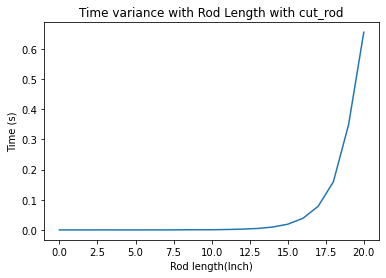

In [33]:
#import the necessary libraries
import time
import matplotlib.pyplot as plt

#set number of iterations
itera = 20

#initialize an empty list to hold the run time for different rod length
run_time = []

#loop through length of 20 (inclusive)
for n in range(21):
    tot_time = 0
    #this calculates the average runtime for a given number of iterations
    for i in range(itera):
        start = time.time()
        #implement the cut_rod function defined above
        cut_rod(P,n)
        #note the time taken for the run
        tot_time += time.time()-start
    #append the average runtime (total time/num of iterations) to the empty list holder of time    
    run_time.append(tot_time/itera)

#plot the time/rod_length graph
plt.title('Time variance with Rod Length with cut_rod')
plt.xlabel('Rod length(Inch)')
plt.ylabel("Time (s)")
plt.plot([n for n in range(21)],run_time)
plt.show()

## Question 3 [time estimate: 2 minutes]

Time (using the time library) the implementation of `extended_bottom_up_cut_rod` for different rod lengths for values of up to $n=20$. Add the curve corresponding to this algorithm to the previous plot.

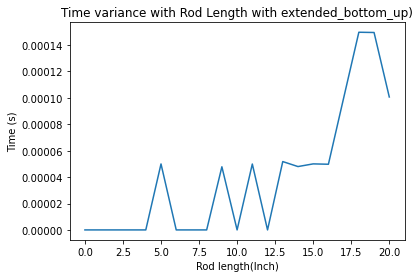

In [29]:
#import the necessary libraries
import time
import matplotlib.pyplot as plt

#set number of iterations
itera = 20

#initialize an empty list to hold the run time for different rod length
run_time = []

#loop through length of 20 (inclusive)
for n in range(21):
    tot_time = 0
    #this calculates the average runtime for a given number of iterations
    for i in range(itera):
        start = time.time()
        #implement the cut_rod function defined above
        extended_bottom_up_cut_rod(P,n)
        #note the time taken for the run
        tot_time += time.time()-start
    #append the average runtime (total time/num of iterations) to the empty list holder of time    
    run_time.append(tot_time/itera)

#plot the time/rod_length graph
plt.title('Time variance with Rod Length with extended_bottom_up)')
plt.xlabel('Rod length(Inch)')
plt.ylabel("Time (s)")
plt.plot([n for n in range(21)],run_time)
plt.show()

## Question 4 [time estimate: 2 minutes]

Contrast both curves. What can you conclude?

The curves does not really say much about the speed of the operation, the first one shows an exponential growth with same time for length 1 up to length 15 then scales really quickly beyong 15. The second graph is a bit funky shaped, however, the biggest contrast between the two is seen at the axis, ( I almost missed this). The second one is much faster and ran in microseconds while the first one runs in miliseconds. The curves alone might not give you the answer as naively looking at them places plot 1 above plot 2. The time axes highlights the time superiority of lot 2.

## Part C - After completing your experiments above, answer the following questions:

## Question 1 [time estimate: 5 minutes]
Estimate how big $n$ has to be before the non-dynamic-programming version will take a million years to finish. Call this value N.

My estimate will come from the time complexity of the non-dynamic algorithm. From our code above, we see that the time complexity of Cut_rod is O(2^N).
T(N) = 2^N
we are looking for T = 1 million years = 3.1556952E+16seconds
from the relationship between logrithm and power
b^y =x, Logb(x) = y
2^N = 3.1556952E+16, log2(3.1556952E+16) = N
N = 54.8 ~ 55. This scales up pretty intensely

## Question 2 [time estimate: 5 minutes]
Estimate (or time) how long it takes to evaluate `extended_bottom_up_cut_rod(p,N)`, where `N` is the value you got from the previous question. 

## Before submission, merge this two

In [38]:
#let P represent the price list for N = 55 (no of N that would take 1 million years)
p = generate_price_list(55)
#initialize the counter
s = time.perf_counter() 

#Run the extended bottom up cutting on P and 55
extended_bottom_up_cut_rod(p, 55)
e = time.perf_counter()  
bigtime = (e-s)
print(bigtime,'seconds')

0.0005132000001140113 seconds


It will only take the dynamic method 0.0005132000001140113 seconds to solve the rod cutting problem that takes its counter part a million years to solve.

## [Optional]  Question 3 [time estimate: 5 minutes]
Do you notice anything peculiar about the solution for large n?

YOUR ANSWER HERE